In [1]:
# %load analyze_conversions.py
#!/usr/bin/env python
import sys, argparse, os
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

ERR_TYPES = ["Co-ordination", "PP Attachment", "NP Attachment", \
        "VP Attachment", "Clause Attachment", "Modifier Attachment", \
        "NP Internal Structure", "Single Word Phrase", "Different label", \
        "XoverX Unary", "Unary", "Other"]

def create_dict():
    d = {}
    for e in ERR_TYPES:
        d[e] = 0
    return d

def parse_out_file(log_file):
    ll = open(log_file).readlines()
    tree_starts = [i for i, x in enumerate(ll) if "MS Tree candidate" in x]
    tree_ends = [i-1 for i in tree_starts[1:]]
    tree_ends.append(len(ll) - 1)
    list_row = []

    for s, e in zip(tree_starts, tree_ends):
        err_dict = create_dict()
        error_types = [x for x in ll[s:e] if 'Error:' in x]
        error_types = [x.strip() for x in error_types]
        error_types = [x.split(' Error:') for x in error_types]
        for count, err in error_types:
            if err not in ERR_TYPES:
                err = "Other"
            err_dict[err] += int(count)
        list_row.append(err_dict)

    dict_list = pd.DataFrame(list_row)
    return dict_list

In [16]:
def count_errors(df, log_dir):
    new_list = []
    list100 = []
    for prefix, df_by_prefix in df.groupby('sent_prefix'):
        log_file = os.path.join(log_dir, prefix + '.out_rev')
        dict_list = parse_out_file(log_file)
        df_by_prefix.loc[:, 'score_rank'] = df_by_prefix.loc[:, 'f1_ms_vs_human'].rank(ascending=False, method='first')
        df_100 = df_by_prefix[df_by_prefix['f1_ms_vs_human'] > 0.99]
        if len(df_100) > 0:
            order = df_100.head(1).sent_id.values[0].split('_')[-1]
            list100.append([prefix, order])
        #df_by_prefix['rr'] = 1/df_by_prefix['score_rank']
        df = df_by_prefix.reset_index().join(dict_list)
        new_list.append(df)
    all_df = pd.concat(new_list)
    return all_df, list100

Number of sentences: 32
[['2015_B30_2', '0'], ['2015_B30_6', '0'], ['2445_A37_6', '0'], ['2445_A93_8', '0'], ['3727_A46_1', '0'], ['3727_B5_1', '0'], ['3727_B5_2', '0']]
[21.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0,0.5,'% good parses')

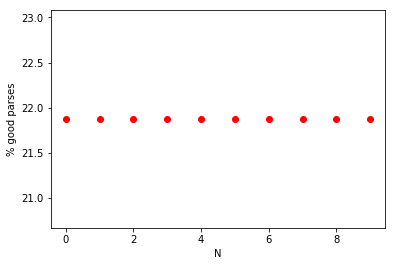

In [31]:
log_dir = 'samples'
result_file ='debug-sents-train-k10-updated.tsv'

df = pd.read_csv(result_file, sep='\t')
df.loc[:, 'sent_prefix'] = df.sent_id.apply(lambda x: '_'.join(x.split('_')[:-1]))

all_df, list100 = count_errors(df, log_dir)

num_sents = len(df.groupby('sent_prefix'))
print "Number of sentences:", num_sents
print list100

N_list = range(10)
orders100 = [int(x[1]) for x in list100]
y100 = [100*orders100.count(i)/float(num_sents) for i in N_list]
print y100
y100 = [sum(y100[:i+1]) for i in range(len(y100))]
plt.plot(N_list, y100, 'or')
plt.xlabel('N')
plt.ylabel('% good parses')
#y100

In [22]:
all_df.head(20)

,Clause Attachment,Co-ordination,Different label,Modifier Attachment,NP Attachment,NP Internal Structure,Other,PP Attachment,Single Word Phrase,Unary,VP Attachment,XoverX Unary,f1_ms_vs_human,index,init_errors,iters,score_rank,sent_id,sent_prefix,tree_score
0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,3.0,7.0,1.0,0.0,0.0,0.213333,20,27,16,6.0,2005_A139_1_0,2005_A139_1,-47.586174
1,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0,7.0,1.0,0.0,0.0,0.210526,21,28,15,9.0,2005_A139_1_1,2005_A139_1,-47.540155
2,0.0,0.0,0.0,0.0,0.0,1.0,8.0,3.0,7.0,1.0,0.0,0.0,0.213333,22,27,16,7.0,2005_A139_1_2,2005_A139_1,-48.154246
3,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,7.0,1.0,0.0,0.0,0.216216,23,26,18,3.0,2005_A139_1_3,2005_A139_1,-50.232405
4,0.0,0.0,2.0,0.0,4.0,0.0,7.0,3.0,7.0,2.0,0.0,0.0,0.219178,24,25,17,1.0,2005_A139_1_4,2005_A139_1,-50.041692
5,0.0,0.0,2.0,0.0,0.0,0.0,8.0,3.0,7.0,2.0,0.0,0.0,0.210526,25,28,17,10.0,2005_A139_1_5,2005_A139_1,-50.219588
6,0.0,0.0,2.0,0.0,8.0,0.0,7.0,0.0,7.0,2.0,0.0,0.0,0.213333,26,27,17,8.0,2005_A139_1_6,2005_A139_1,-50.183347
7,0.0,0.0,2.0,0.0,4.0,0.0,8.0,0.0,7.0,1.0,0.0,0.0,0.216216,27,26,16,4.0,2005_A139_1_7,2005_A139_1,-49.992344
8,0.0,0.0,2.0,0.0,0.0,0.0,5.0,7.0,8.0,1.0,0.0,0.0,0.216216,28,26,18,5.0,2005_A139_1_8,2005_A139_1,-50.800097
9,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0,8.0,1.0,0.0,0.0,0.219178,29,25,17,2.0,2005_A139_1_9,2005_A139_1,-50.609333


14
[['2005_A141_0', '2'], ['2015_B30_2', '0'], ['2015_B30_6', '0'], ['2020_B100_1', '0'], ['2264_A35_0', '0'], ['2264_A41_2', '7'], ['2264_A65_2', '5'], ['2264_B48_1', '6'], ['2445_A37_6', '0'], ['2445_A93_8', '0'], ['3727_A46_1', '0'], ['3727_B5_0', '2'], ['3727_B5_1', '0'], ['3727_B5_2', '0']]
[28.125, 0.0, 6.25, 0.0, 0.0, 3.125, 3.125, 3.125, 0.0, 0.0]


Text(0,0.5,'% good parses')

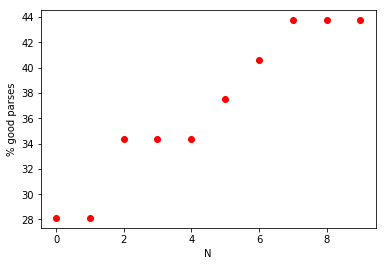

In [33]:
list80 = []
for prefix, df_by_prefix in all_df.groupby('sent_prefix'):
    this_df = df_by_prefix[(df_by_prefix.score_rank == 1) & \
                           (df_by_prefix.f1_ms_vs_human > 0.8)]
    if len(this_df) > 0:
        order = this_df.head(1).sent_id.values[0].split('_')[-1]
        list80.append([prefix, order])
        
print len(list80)
print list80
orders80 = [int(x[1]) for x in list80]
# cumulative scoring
y80 = [100*orders80.count(i)/float(num_sents) for i in N_list]
print y80
y80 = [sum(y80[:i+1]) for i in range(len(y80))]
plt.plot(N_list, y80, 'ro')
plt.xlabel('N')
plt.ylabel('% good parses')


In [35]:
all_df[all_df.sent_prefix=='2264_A41_2']

,Clause Attachment,Co-ordination,Different label,Modifier Attachment,NP Attachment,NP Internal Structure,Other,PP Attachment,Single Word Phrase,Unary,VP Attachment,XoverX Unary,f1_ms_vs_human,index,init_errors,iters,score_rank,sent_id,sent_prefix,tree_score
0,2.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,4.0,1.0,0.0,0.0,0.851064,243,16,12,6.0,2264_A41_2_0,2264_A41_2,-2.206510
1,4.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,4.0,1.0,0.0,0.0,0.851064,244,16,13,7.0,2264_A41_2_1,2264_A41_2,-4.228886
2,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,4.0,1.0,0.0,0.0,0.869565,245,15,12,4.0,2264_A41_2_2,2264_A41_2,-7.255900
3,2.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,4.0,1.0,0.0,0.0,0.851064,246,16,12,8.0,2264_A41_2_3,2264_A41_2,-5.967422
4,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,4.0,1.0,0.0,0.0,0.869565,247,15,12,5.0,2264_A41_2_4,2264_A41_2,-7.123294
5,2.0,0.0,0.0,1.0,2.0,0.0,7.0,0.0,4.0,1.0,0.0,0.0,0.833333,248,17,13,9.0,2264_A41_2_5,2264_A41_2,-3.582311
6,4.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,4.0,1.0,0.0,0.0,0.833333,249,17,14,10.0,2264_A41_2_6,2264_A41_2,-5.532200
7,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,5.0,2.0,0.0,0.0,0.958333,250,17,14,1.0,2264_A41_2_7,2264_A41_2,-7.975466
8,2.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,5.0,2.0,0.0,0.0,0.938776,251,18,14,3.0,2264_A41_2_8,2264_A41_2,-8.227298
9,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,5.0,2.0,0.0,0.0,0.956522,252,17,13,2.0,2264_A41_2_9,2264_A41_2,-4.864589


Text(0,0.5,'% good parses')

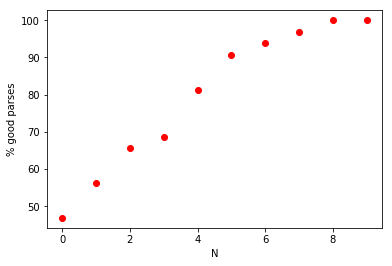

In [32]:
list_all = []
for prefix, df_by_prefix in all_df.groupby('sent_prefix'):
    this_df = df_by_prefix[df_by_prefix.score_rank == 1]
    order = this_df.head(1).sent_id.values[0].split('_')[-1]
    list_all.append([prefix, order])
    
orders_all = [int(x[1]) for x in list_all]
y_all = [100*orders_all.count(i)/float(num_sents) for i in N_list]
y_all = [sum(y_all[:i+1]) for i in range(len(y_all))]
plt.plot(N_list, y_all, 'ro')
plt.xlabel('N')
plt.ylabel('% good parses')

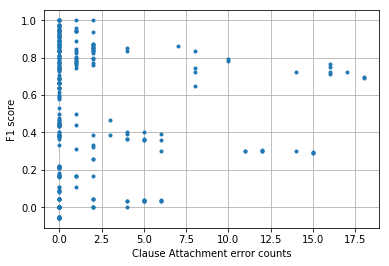

In [25]:
#plt.plot(all_df["Clause Attachment"], all_df.f1_ms_vs_human, '.')
#plt.plot(all_df["Single Word Phrase"], all_df.f1_ms_vs_human, '.')
feat = "Clause Attachment"
plt.plot(all_df[feat], all_df.f1_ms_vs_human, '.')
plt.xlabel(feat + ' error counts')
plt.ylabel('F1 score')
plt.grid()

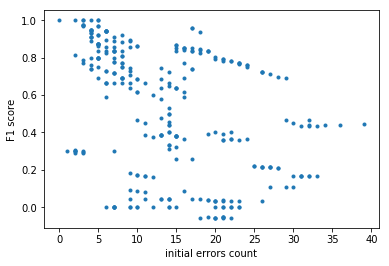

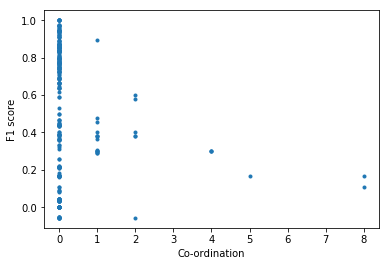

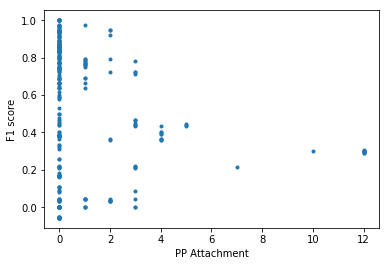

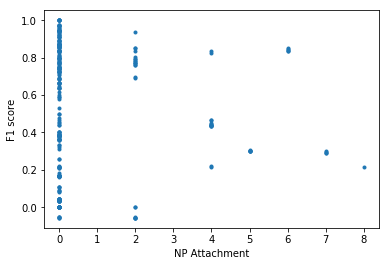

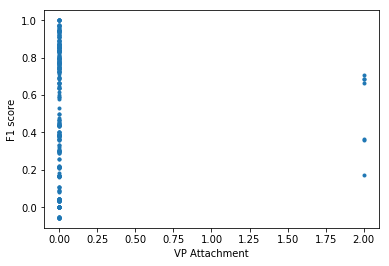

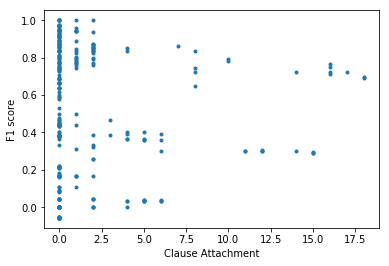

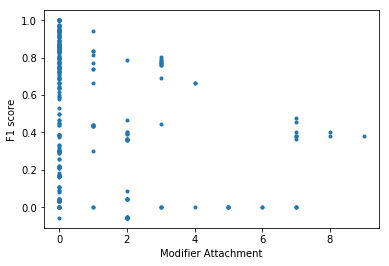

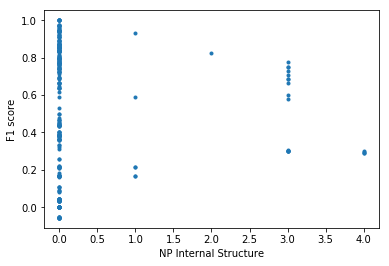

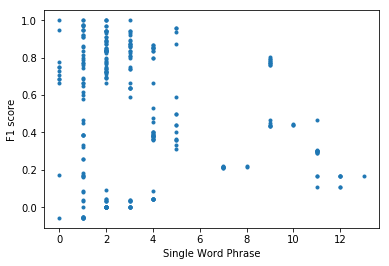

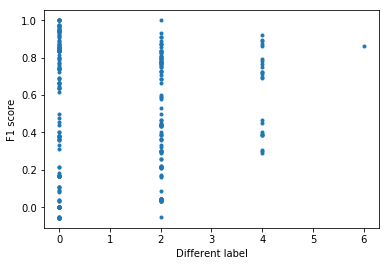

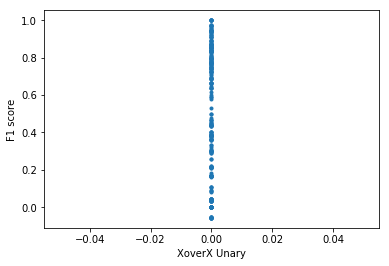

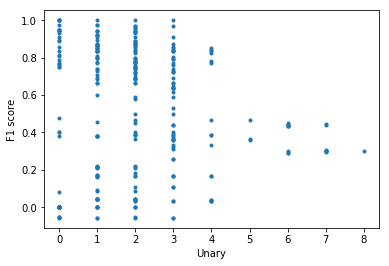

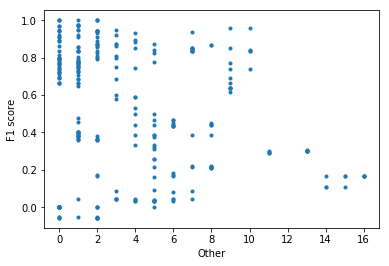

In [26]:
plt.plot(all_df["init_errors"], all_df.f1_ms_vs_human, '.')
plt.xlabel('initial errors count')
plt.ylabel('F1 score')
plt.show()

#plt.figure(2, figsize=(20,10))
for e in ERR_TYPES:
    plt.figure()
    plt.plot(all_df[e], all_df.f1_ms_vs_human, '.')
    plt.xlabel(e)
    plt.ylabel('F1 score')

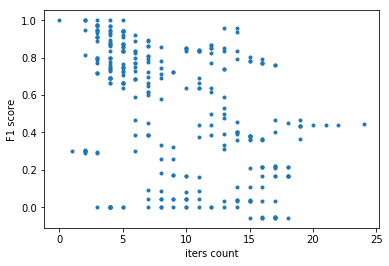

In [27]:
plt.plot(all_df["iters"], all_df.f1_ms_vs_human, '.')
plt.xlabel('iters count')
plt.ylabel('F1 score')
plt.show()

In [28]:
scores = []
for prefix, df_by_prefix in all_df.groupby('sent_prefix'):
    scores.append([prefix, df_by_prefix.f1_ms_vs_human.mean(), df_by_prefix.f1_ms_vs_human.std()])

sorted(scores, key=lambda x: x[1])

[['3393_B50_3', -0.05511368511373001, 0.0010319915208032507],
 ['2264_B42_0', 0.0, 0.0],
 ['2264_B48_2', 0.0, 0.0],
 ['3727_A46_2', 0.035783777625870004, 0.0004716223167690292],
 ['3393_B6_0', 0.048506807202439994, 0.013523927931561772],
 ['2020_A131_0', 0.12841765480895, 0.060151940432316524],
 ['2005_A99_0', 0.14881757546440003, 0.0287813810265473],
 ['2005_A139_1', 0.2148057444609, 0.0031150881794163804],
 ['2039_A110_0', 0.2988902315947, 0.0054559716464692735],
 ['2264_B60_2', 0.36387096774210004, 0.07106398021919695],
 ['2264_A33_4', 0.3768852459018, 0.017385581756804866],
 ['2445_A39_3', 0.3999134199131, 0.03638756399141976],
 ['2039_A116_0', 0.44005771663510007, 0.08934229548111947],
 ['2005_A147_1', 0.44539097002389993, 0.012123014864352832],
 ['2264_A33_1', 0.6785071225072999, 0.053978517860417095],
 ['2264_A33_3', 0.6902564102566, 0.026477523385808832],
 ['2015_B30_4', 0.6933455522972001, 0.06374298097552922],
 ['2264_A35_0', 0.7302169733206001, 0.054098810026936464],
 ['2020

In [29]:
sorted(scores, key=lambda x: x[2])

[['2264_B42_0', 0.0, 0.0],
 ['2264_B48_2', 0.0, 0.0],
 ['3727_A46_2', 0.035783777625870004, 0.0004716223167690292],
 ['3393_B50_3', -0.05511368511373001, 0.0010319915208032507],
 ['2005_A139_1', 0.2148057444609, 0.0031150881794163804],
 ['2039_A110_0', 0.2988902315947, 0.0054559716464692735],
 ['2005_A141_0', 0.8398733889997001, 0.008784095342166754],
 ['2005_A147_1', 0.44539097002389993, 0.012123014864352832],
 ['3393_B6_0', 0.048506807202439994, 0.013523927931561772],
 ['2264_A65_2', 0.7788220374075001, 0.014266504630918789],
 ['2264_A33_4', 0.3768852459018, 0.017385581756804866],
 ['2264_A33_3', 0.6902564102566, 0.026477523385808832],
 ['2005_A99_0', 0.14881757546440003, 0.0287813810265473],
 ['2445_A93_8', 0.9506072874494998, 0.03127101480213512],
 ['2020_B100_3', 0.7349115780494999, 0.034779002633875504],
 ['2020_B100_1', 0.8577705525074, 0.03617829723903661],
 ['2445_A39_3', 0.3999134199131, 0.03638756399141976],
 ['2015_B30_6', 0.9736842105265, 0.037216146377978904],
 ['2445_A37